<a href="https://colab.research.google.com/github/GergelyTuri/fiberphotometry/blob/main/notebooks/PCB_serotonin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.size'] = 18 # set font size for all figures

from tdt import read_block, download_demo_data, StructType
%config Completer.use_jedi = False

In [5]:
!pip install tdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 1.9 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
data_path = "/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/nia_11-240626-142339"

In [7]:

data = read_block(data_path)
print(data)
print('===============')
print(data.info)

Found Synapse note file: /gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/nia_11-240626-142339/Notes.txt
read from t=0s to t=3719.62s
epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])
tankpath:	'/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323'
blockname:	'nia_11-240626-142339'
start_date:	datetime.datetime(2024, 6, 26, 18, 23, 42, 999999)
utc_start_time:	'18:23:42'
stop_date:	datetime.datetime(2024, 6, 26, 19, 25, 42, 621075)
utc_stop_time:	'19:25:42'
duration:	datetime.timedelta(seconds=3719, microseconds=621076)
stream_channel:	0
snip_channel:	0
experiment:	'drug_experiment'
subject:	'nia_11'
user:	'User'
start:	'2:23:43pm 06/26/2024'
stop:	'3:25:43pm 06/26/2024'


In [8]:
data.streams.keys()

dict_keys(['_405A', '_465A', '_405B', '_465B', 'Fi1d', 'Fi1r'])

In [12]:
serotonin = '_465A' # serotonin channel
ISOS = '_405A' # Isosbestic channel
LICK = 'Ler_'

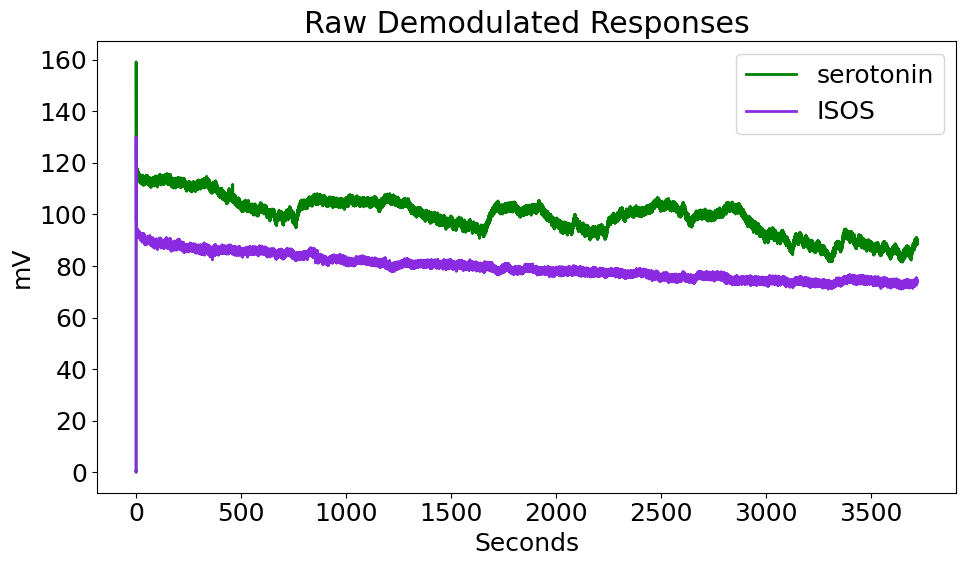

In [14]:
npts = len(data.streams[serotonin].data)
time_x = np.linspace(1, npts, npts) / data.streams[serotonin].fs
fig1 = plt.figure(figsize=(10,6))
ax0 = fig1.add_subplot(111)
p1, = ax0.plot(time_x, data.streams[serotonin].data, linewidth=2,
               color='green', label='serotonin')
p2, = ax0.plot(time_x, data.streams[ISOS].data, linewidth=2,
               color='blueviolet', label='ISOS')

ax0.set_ylabel('mV')
ax0.set_xlabel('Seconds')
ax0.set_title('Raw Demodulated Responses')
ax0.legend(handles=[p1,p2], loc='upper right')
fig1.tight_layout()
plt.show()